In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = yf.Ticker("NKE")
# print(data) ## Prints a ticker object
# print(data.info)
# print("--------------------")
# print("--------------------")
# print(data.history(period='max')) ## must be of the format 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max, etc.

nke_df = pd.DataFrame(data.history(period='max'))
nke_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-02 00:00:00-05:00,0.125838,0.128573,0.125838,0.125838,100710400,0.0,0.0
1980-12-03 00:00:00-05:00,0.124469,0.124469,0.123102,0.123102,25177600,0.0,0.0
1980-12-04 00:00:00-05:00,0.127205,0.128573,0.127205,0.127205,22694400,0.0,0.0


In [34]:
nke_df['Intraday'] = nke_df['Close'] - nke_df['Open']
# Calculate Log Returns
nke_df['Log Return'] = np.log(nke_df['Close'] / nke_df['Close'].shift(1))
nke_df['Pct Change'] = nke_df['Close'].pct_change(periods=1)
nke_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intraday,Log Return,SMA_50,SMA_200,Pct Change
Date,,,,,,,,,,,,
1980-12-02 00:00:00-05:00,0.125838,0.128573,0.125838,0.125838,100710400,0.0,0.0,0.000000,NaN,NaN,NaN,NaN
1980-12-03 00:00:00-05:00,0.124469,0.124469,0.123102,0.123102,25177600,0.0,0.0,-0.001368,-0.021983,NaN,NaN,-0.021743
1980-12-04 00:00:00-05:00,0.127205,0.128573,0.127205,0.127205,22694400,0.0,0.0,0.000000,0.032792,NaN,NaN,0.033336


In [37]:
## Some EDA
print(nke_df[['Close', 'Intraday','Volume']].describe())
print("-----------------------------")
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
print(nke_df_filtered[['Close', 'Intraday','Volume']].describe())

print("-----------------------------")
# Calculate variance and standard deviation
variance = nke_df_filtered['Close'].var()
standard_deviation = nke_df_filtered['Close'].std()

print(f"Variance of daily returns: {variance}")
print(f"Standard Deviation of daily returns: {standard_deviation}")

              Close      Intraday        Volume
count  11156.000000  11156.000000  1.115600e+04
mean      24.561813      0.002203  1.166097e+07
std       36.938505      0.596118  1.036980e+07
min        0.075229     -6.281965  0.000000e+00
25%        1.159084     -0.046717  6.182400e+06
50%        5.649765      0.000000  8.963200e+06
75%       32.983641      0.054790  1.359190e+07
max      169.295303      6.245201  1.574456e+08
-----------------------------
             Close     Intraday        Volume
count  3817.000000  3817.000000  3.817000e+03
mean     64.763177     0.002098  8.765250e+06
std      38.790697     1.010462  5.547164e+06
min      12.672383    -6.281965  1.821900e+06
25%      31.499949    -0.338950  5.831000e+06
50%      55.141251     0.009784  7.512800e+06
75%      92.882332     0.371258  9.951900e+06
max     169.295303     6.245201  1.299670e+08
-----------------------------
Variance of daily returns: 1504.7182112751418
Standard Deviation of daily returns: 38.79069748

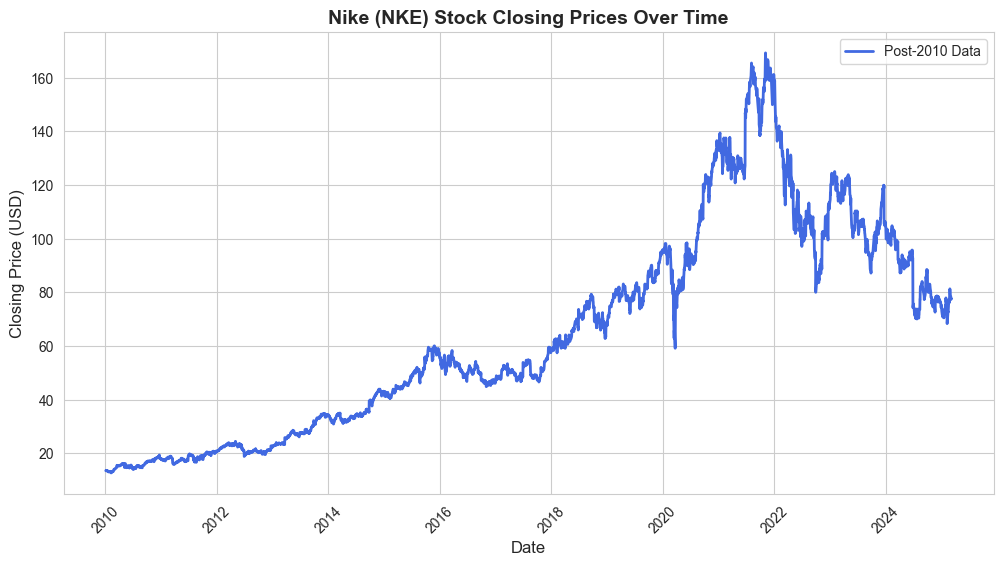

In [12]:
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")  # Options: "darkgrid", "white", "whitegrid", "ticks"

# Create the figure
plt.figure(figsize=(12, 6))

# # Plot the full stock closing prices
# sns.lineplot(data=nke_df, x=nke_df.index, y='Close', 
#              label='Full Data', color='gray', linewidth=1.5, alpha=0.5)

# Filtered dataset from Jan 1, 2010
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']

# Plot the filtered stock closing prices
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Close', 
             label='Post-2010 Data', color='royalblue', linewidth=2)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) Stock Closing Prices Over Time', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.show()


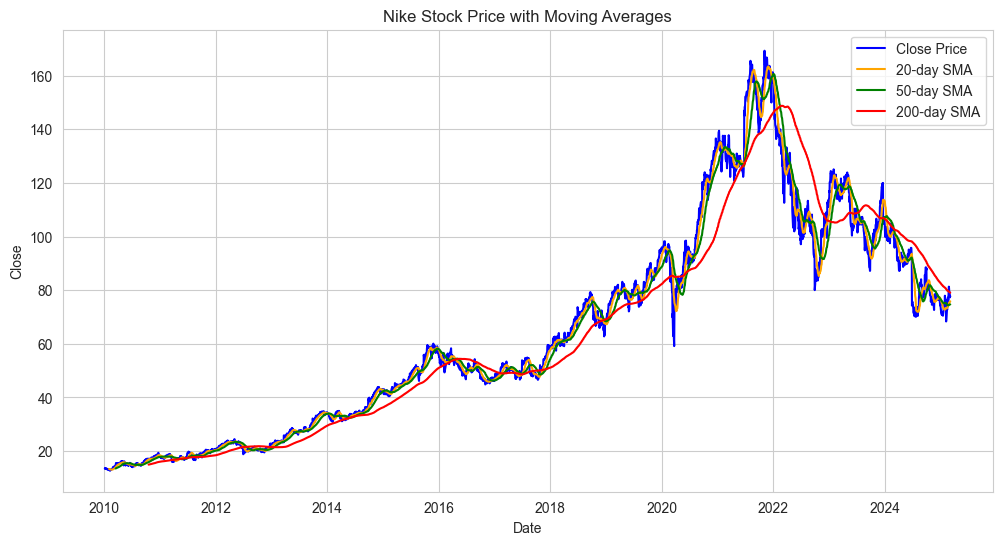

In [39]:
# Simple Moving Average (SMA)
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
nke_df_filtered['SMA_20'] = nke_df_filtered['Close'].rolling(window=20).mean()
nke_df_filtered['SMA_50'] = nke_df_filtered['Close'].rolling(window=50).mean()
nke_df_filtered['SMA_200'] = nke_df_filtered['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['Close'], label="Close Price", color="blue")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_20'], label="20-day SMA", color="orange")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_50'], label="50-day SMA", color="green")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_200'], label="200-day SMA", color="red")
plt.title("Nike Stock Price with Moving Averages")
plt.show()

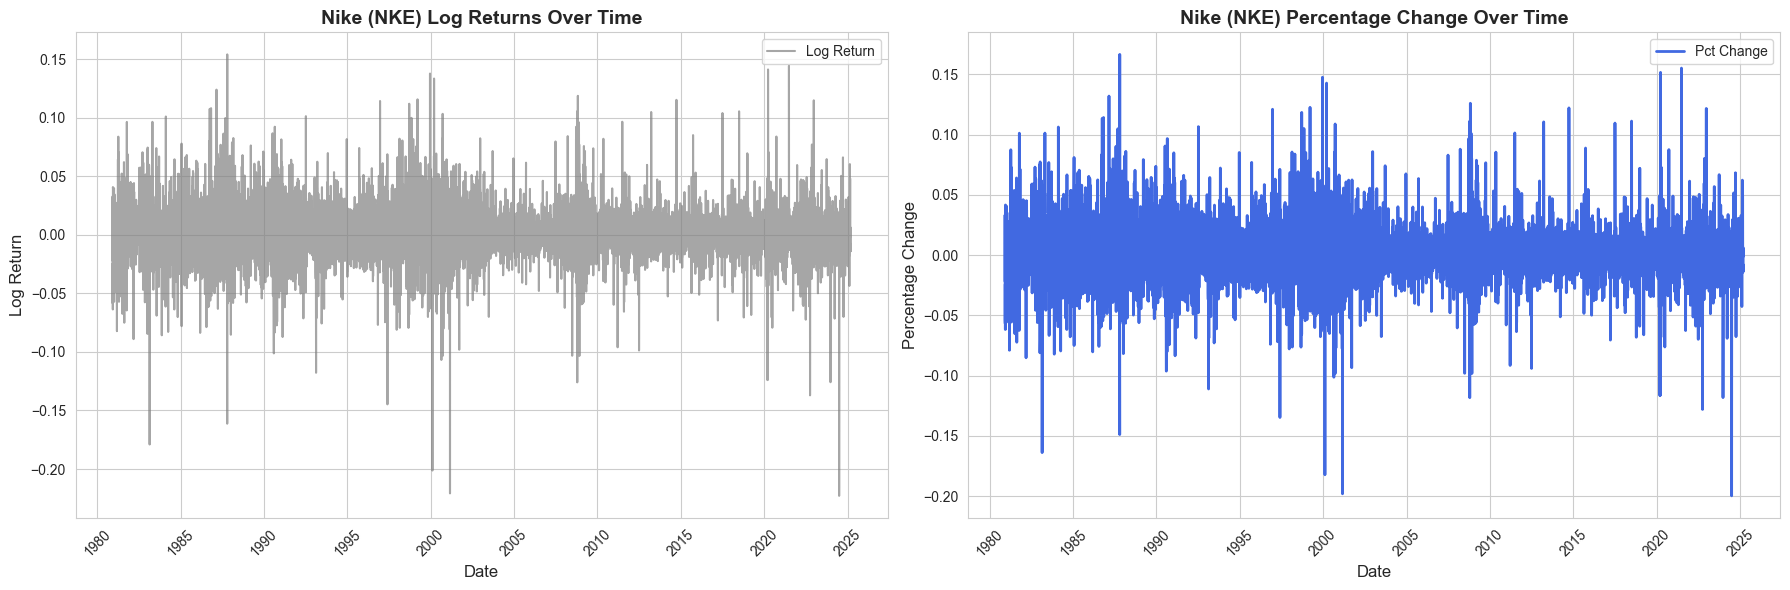

In [35]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two side-by-side plots

# 🔹 Plot 1: Log Return Over Time
sns.lineplot(ax=axes[0], data=nke_df, x=nke_df.index, y='Log Return', 
             label='Log Return', color='gray', linewidth=1.5, alpha=0.7)
axes[0].set_title("Nike (NKE) Log Returns Over Time", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Date", fontsize=12)
axes[0].set_ylabel("Log Return", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# 🔹 Plot 2: Percentage Change Over Time
sns.lineplot(ax=axes[1], data=nke_df, x=nke_df.index, y='Pct Change', 
             label='Pct Change', color='royalblue', linewidth=2)
axes[1].set_title("Nike (NKE) Percentage Change Over Time", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Percentage Change", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
# Find the top 5 log return gains (largest positive)
top_gains = nke_df_filtered.nlargest(5, 'Log Return')[['Log Return']]
top_gains_dates = top_gains.index

# Find the top 5 log return losses (largest negative)
top_losses = nke_df_filtered.nsmallest(5, 'Log Return')[['Log Return']]
top_losses_dates = top_losses.index

# Display results
print("Top 5 Log Return Gains:")
print(top_gains)

print("/n Top 5 Log Return Losses:")
print(top_losses)

Top 5 Log Return Gains:
                           Log Return
Date                                 
2021-06-25 00:00:00-04:00    0.144373
2020-03-24 00:00:00-04:00    0.141284
2014-09-26 00:00:00-04:00    0.115342
2022-12-21 00:00:00-05:00    0.114926
2018-06-29 00:00:00-04:00    0.105528
/n Top 5 Log Return Losses:
                           Log Return
Date                                 
2024-06-28 00:00:00-04:00   -0.222905
2022-09-30 00:00:00-04:00   -0.137059
2023-12-22 00:00:00-05:00   -0.125854
2020-03-12 00:00:00-04:00   -0.124052
2020-03-16 00:00:00-04:00   -0.123638


Text(0.5, 1.0, 'Distribution of Nike Log Returns')

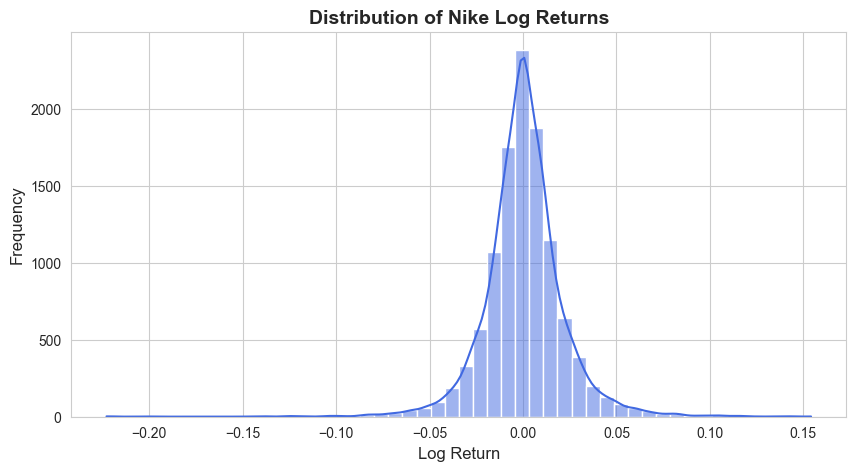

In [21]:
# Create histogram
plt.figure(figsize=(10, 5))
sns.histplot(nke_df['Log Return'], bins=50, kde=True, color="royalblue")

# Add labels and title
plt.xlabel("Log Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Nike Log Returns", fontsize=14, fontweight="bold")

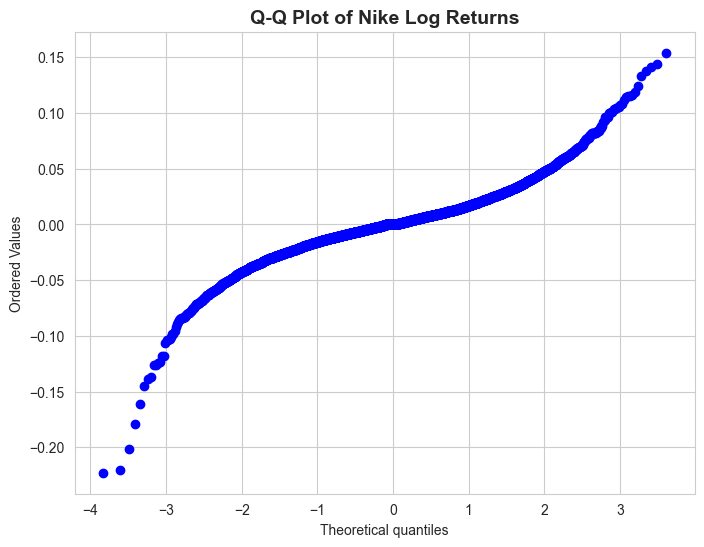

In [ ]:
##Returns are NOT normally distrubuted
# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(nke_df['Log Return'], dist="norm", plot=plt)

# Add title
plt.title("Q-Q Plot of Nike Log Returns", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Nike (NKE) - Volume vs. Close Price')

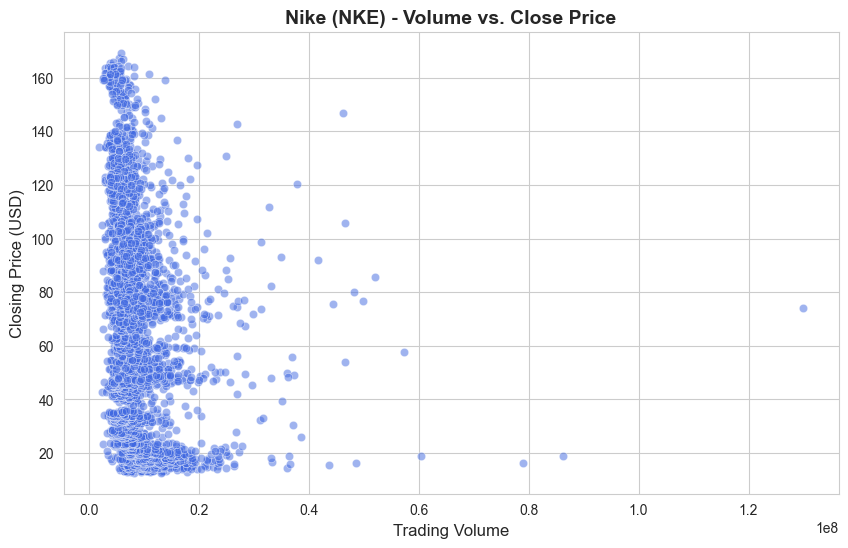

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatterplot of Volume vs Close Price
sns.scatterplot(data=nke_df_filtered, x='Volume', y='Volume', alpha=0.5, color='royalblue')

# Labels and title
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) - Volume vs. Close Price', fontsize=14, fontweight='bold')

# Show plot